# Projets Expérimentaux Scientifiques

### UE PHY3099L | L3 physique, parcours ingénierie physique
### Projet : Diffusion

#### M. MADI, E. GAUVIN, S. SERRANO

## Importation des modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

## Tracés et ajustements des mesures type loi de Malus

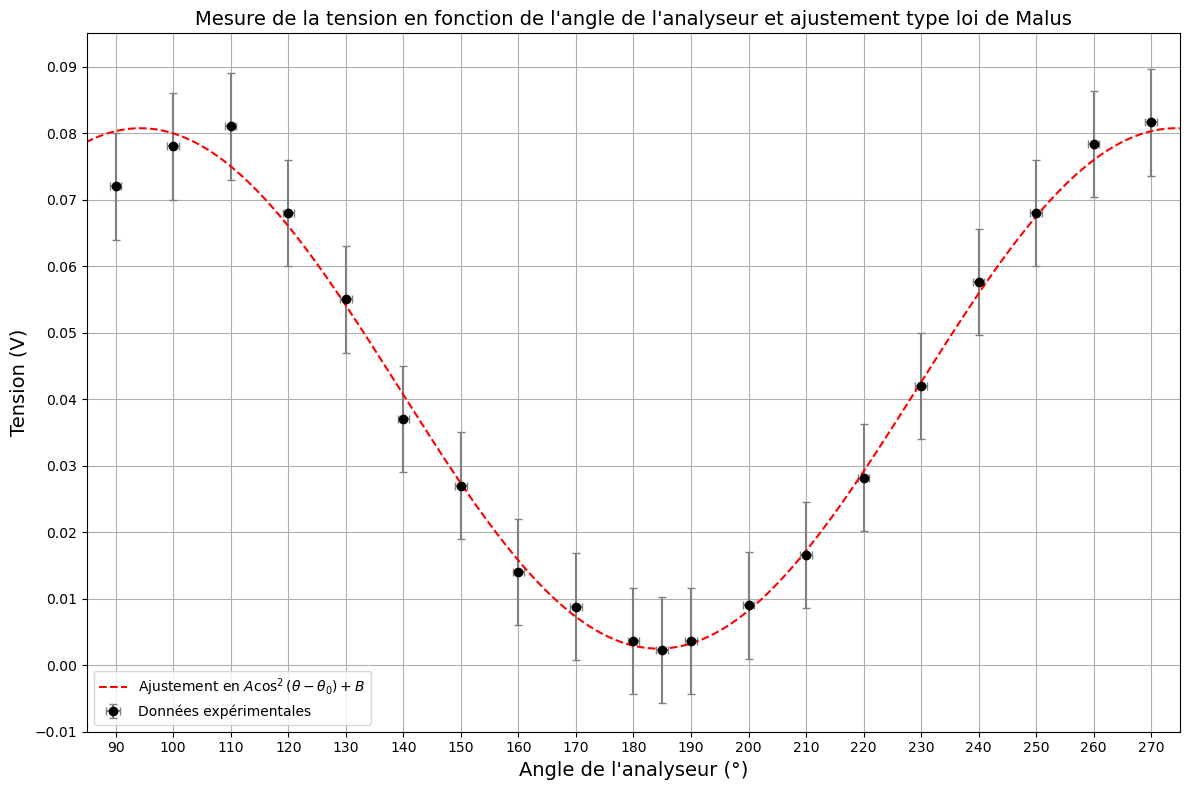

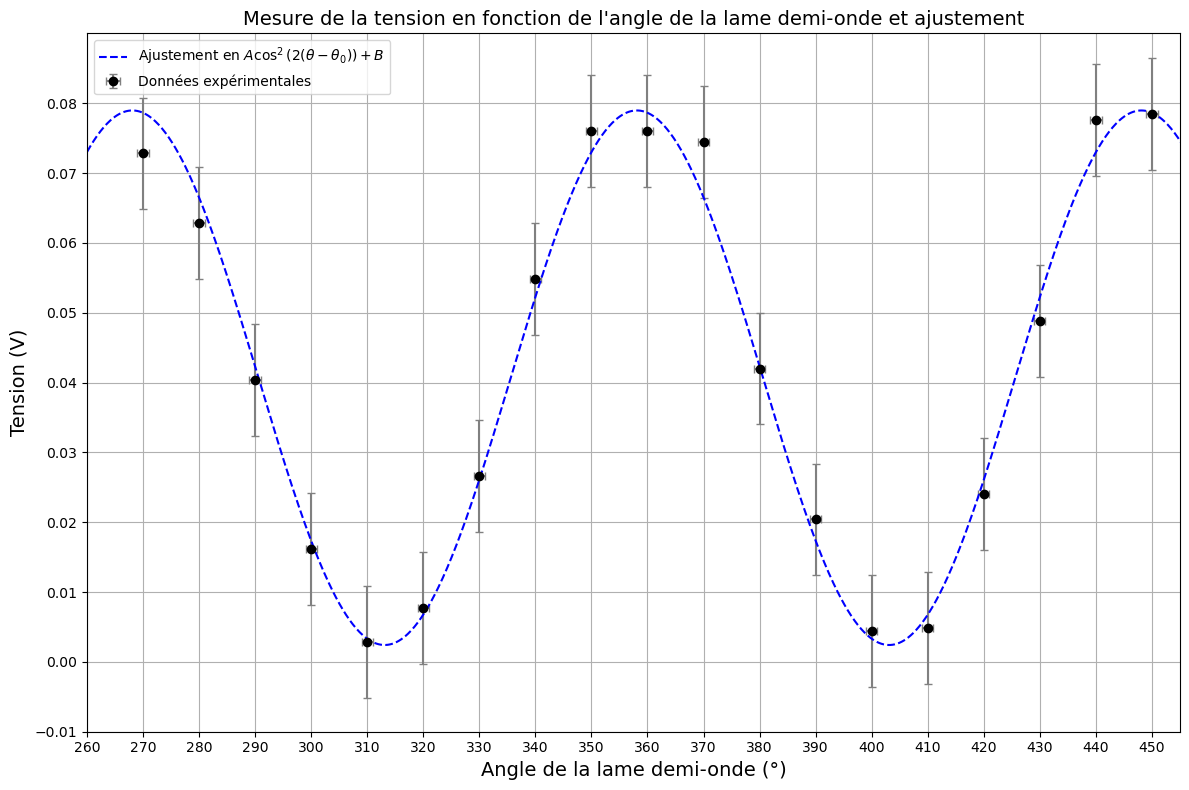

Analyseur :
 Maximas à (°): [ 94.21421421 274.39439439]
 Minimas à (°): [184.3043043]

Lame demi-onde :
 Maximas à (°): [268.20820821 358.0980981  448.18818819]
 Minimas à (°): [313.05305305 403.14314314]

Paramètres ajustés (Analyseur) :
A = 0.0782, theta0 = 274.3044, B = 0.0025

Paramètres ajustés (Lame demi-onde) :
A = 0.0765, theta0 = 448.1097, B = 0.0024

Période imposée (Analyseur) : 180.00000°
Période imposée (Lame demi-onde) : 90.00000°


In [5]:
# 1. Modèles à 3 paramètres (k fixé implicitement par période)
def malus_an(theta, A, theta0, B):
    return A * np.cos(np.radians(theta - theta0))**2 + B  # Période = 180°

def malus_lame(theta, A, theta0, B):
    return A * np.cos(np.radians(2 * (theta - theta0)))**2 + B  # Période = 90°

# 2. Données expérimentales
angle_an = np.array([90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
                     185, 190, 200, 210, 220, 230, 240, 250, 260, 270])
tension_an = 0.001 * np.array([72, 78, 81, 68, 55, 37, 27, 14, 8.8, 3.68,
                               2.3, 3.68, 9, 16.6, 28.2, 42, 57.6, 68, 78.4, 81.6])

angle_lame = np.array([270, 280, 290, 300, 310, 320, 330, 340, 350, 360,
                       370, 380, 390, 400, 410, 420, 430, 440, 450])
tension_lame = 0.001 * np.array([72.8, 62.8, 40.4, 16.2, 2.9, 7.7, 26.6, 54.8, 76, 76,
                                 74.4, 42, 20.4, 4.4, 4.8, 24, 48.8, 77.6, 78.4])

# 3. Estimations initiales (A, theta0, B) et bornes
A_ini = max(tension_an.max(), tension_lame.max()) - min(tension_an.min(), tension_lame.min())
theta0_ini_an = angle_an[np.argmax(tension_an)]
B_ini = min(tension_an.min(), tension_lame.min())
theta0_ini_lame = angle_lame[np.argmax(tension_lame)]
p0_lame = [A_ini, theta0_ini_lame, B_ini]

bounds = ([0, 0, 0], [1, 460, 0.1])
p0_an = [A_ini, theta0_ini_an, B_ini]


# 4. Ajustement des courbes
popt_an, pcov_an = curve_fit(malus_an, angle_an, tension_an, p0=p0_an, bounds=bounds)
popt_lame, pcov_lame = curve_fit(malus_lame, angle_lame, tension_lame, p0=p0_lame, bounds=bounds)

# 5a. Tracé Analyseur
theta_fine_an = np.linspace(80, 280, 1000)
fit_an = malus_an(theta_fine_an, *popt_an)
plt.figure(figsize=(12, 8))
plt.errorbar(angle_an, tension_an, xerr=1, yerr=0.008, fmt='o', label="Données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fine_an, fit_an, 'r--', label=r"Ajustement en $A \cos^2(\theta - \theta_0) + B$")
plt.xlabel("Angle de l'analyseur (°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Mesure de la tension en fonction de l'angle de l'analyseur et ajustement type loi de Malus", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(85, 275)
plt.ylim(-0.01, 0.095)
plt.xticks(np.arange(90, 280, 10))
plt.yticks(np.arange(-0.01, 0.095, 0.01))
plt.tight_layout()
plt.savefig("fit_analyseur_3param.png", dpi=300)
plt.show()

# 5b. Tracé Lame demi-onde
theta_fine_lame = np.linspace(260, 460, 1000)
fit_lame = malus_lame(theta_fine_lame, *popt_lame)
plt.figure(figsize=(12, 8))
plt.errorbar(angle_lame, tension_lame, xerr=1, yerr=0.008, fmt='o', label="Données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fine_lame, fit_lame, 'b--', label=r"Ajustement en $A \cos^2(2(\theta - \theta_0)) + B$")
plt.xlabel("Angle de la lame demi-onde (°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Mesure de la tension en fonction de l'angle de la lame demi-onde et ajustement", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(265, 455)
plt.ylim(-0.01, 0.09)
plt.xticks(np.arange(260, 460, 10))
plt.yticks(np.arange(-0.01, 0.09, 0.01))
plt.tight_layout()
plt.savefig("fit_lame_demi_onde_3param.png", dpi=300)
plt.show()

# 6. Calcul des extremas
imax_an = argrelextrema(fit_an, np.greater)[0]
imin_an = argrelextrema(fit_an, np.less)[0]
imax_l = argrelextrema(fit_lame, np.greater)[0]
imin_l = argrelextrema(fit_lame, np.less)[0]

print("Analyseur :")
print(" Maximas à (°):", theta_fine_an[imax_an])
print(" Minimas à (°):", theta_fine_an[imin_an])

print("\nLame demi-onde :")
print(" Maximas à (°):", theta_fine_lame[imax_l])
print(" Minimas à (°):", theta_fine_lame[imin_l])

# 7. Affichage des paramètres ajustés
print("\nParamètres ajustés (Analyseur) :")
print(f"A = {popt_an[0]:.4f}, theta0 = {popt_an[1]:.4f}, B = {popt_an[2]:.4f}")

print("\nParamètres ajustés (Lame demi-onde) :")
print(f"A = {popt_lame[0]:.4f}, theta0 = {popt_lame[1]:.4f}, B = {popt_lame[2]:.4f}")

print(f"\nPériode imposée (Analyseur) : 180.00000°")
print(f"Période imposée (Lame demi-onde) : 90.00000°")


## Création des listes des différentes séries de mesure

In [7]:
# Écrémé 100%
ep_1 = np.array([10.323, 10.656, 11.1888, 11.8548, 12.0213, 11.6883, 11.2887, 10.5894, 10.1232, 10.7892,
                   11.0556, 11.3886, 11.8881, 12.321, 11.3886, 10.656, 10.1898, 9.7236, 9.7902])
ep_2 = np.array([10.7226, 10.8891, 11.4219, 12.0546, 12.321, 11.988, 11.3886, 10.8225, 10.323, 10.1898,
                   11.0556, 11.5218, 11.8548, 12.0546, 11.322, 10.8558, 10.2564, 9.7902, 9.7236])
ep_mean = (ep_1 + ep_2)/2

# Entier | facteur 50
ent50_1 = np.array([1.49184, 2.01132, 3.10356, 4.2957, 4.995, 4.8618, 4.0626, 2.8305, 1.83816, 1.49184,
                    1.94472, 3.0636, 4.1292, 4.8285, 4.6287, 3.7629, 2.7306, 1.75824, 1.38528])
ent50_2 = np.array([1.49184, 2.10456, 3.22344, 4.2957, 5.0283, 4.8618, 4.0626, 2.82384, 1.8648, 1.54512,
                    2.02464, 3.09024, 4.1292, 4.8951, 4.6287, 3.8295, 2.7306, 1.75824, 1.41192])
ent50_mean = (ent50_1 + ent50_2)/2

# Entier | facteur 100
ent100_1 = np.array([0.88245, 1.0989, 1.61172, 2.17116, 2.55744, 2.41716, 1.98516, 1.35384, 0.92241, 0.78471,
                     0.92241, 1.42644, 1.94856, 2.27049, 2.18625, 1.83909, 1.3092, 0.87579, 0.71331])
ent100_2 = np.array([1.05228, 1.21212, 1.665, 2.05128, 2.31768, 2.18424, 1.83909, 1.38882, 1.10556, 0.93177,
                     1.1406, 1.57821, 1.92519, 2.1396, 2.03802, 1.83909, 1.3092, 1.01664, 0.87579])
ent100_mean = (ent100_1 + ent100_2)/2


# Entier 100%
entp_1 = np.array([8.4582, 8.325, 8.4249, 8.2917, 8.2584, 8.0586, 7.8921, 7.8255, 8.4582, 8.8911,
                      9.0911, 9.1244, 9.191, 8.8245, 7.8588, 7.3242, 7.3242, 7.524, 7.6572])
entp_2 = np.array([8.8911, 8.658, 8.5248, 8.658, 8.5581, 8.3916, 8.2584, 8.1918, 8.1252, 8.2584,
                      8.3916, 8.7246, 8.658, 8.3916, 8.0586, 7.5915, 7.3917, 7.524, 7.9917])
entp_mean = (entp_1 + entp_2)/2

# Entier | facteur 1000
ent1000_1 = np.array([0.053, 0.0984, 0.186, 0.29, 0.348, 0.344, 0.268, 0.17, 0.092,
                      0.056, 0.093, 0.183, 0.266, 0.313, 0.309, 0.248, 0.156, 0.088, 0.0536])
ent1000_2 = np.array([0.058, 0.1, 0.196, 0.288, 0.34, 0.334, 0.264, 0.169, 0.084,
                      0.056, 0.1, 0.184, 0.282, 0.338, 0.32, 0.256, 0.162, 0.09, 0.06])
ent1000_3 = np.array([0.068, 0.11, 0.2, 0.292, 0.34, 0.328, 0.264, 0.174, 0.096,
                      0.068, 0.108, 0.194, 0.276, 0.328, 0.316, 0.25, 0.158, 0.09, 0.068])
ent1000_mean = (ent1000_1 + ent1000_2+ ent1000_3)/3


# Entier | facteur 10
ent10_1 = np.array([8.5248, 9.0576, 10.1232, 11.4552, 11.988, 11.7216, 10.9224, 9.5904, 8.5248,
                    9.0576, 9.8568, 10.9224, 12.5208, 12.7872, 12.5208, 11.1888, 9.5904, 8.2584, 7.992])
ent10_2 = np.array([8.5248, 9.324, 10.656, 11.7216, 12.7872, 12.2544, 11.4552, 9.8568, 9.1908,
                    9.0576, 9.8568, 10.656, 12.2544, 12.5874, 11.7216, 10.7892, 9.324, 8.2584, 7.992])
ent10_3 = np.array([8.7912, 9.0576, 10.3896, 11.7216, 12.3876, 11.988, 11.1888, 9.8568, 9.0576,
                    8.7912, 9.324, 10.656, 11.7216, 11.988, 11.7216, 10.656, 9.324, 8.3916, 8.1252])
ent10_mean = (ent10_1 + ent10_2+ ent10_3)/3

# Entier | facteur 500
ent500_1 = np.array([0.13, 0.196, 0.344, 0.51, 0.616, 0.6, 0.488, 0.32, 0.184,
                     0.138, 0.204, 0.374, 0.536, 0.648, 0.624, 0.5, 0.334, 0.192, 0.128])
ent500_2 = np.array([0.154, 0.212, 0.356, 0.524, 0.63, 0.625, 0.502, 0.334, 0.204,
                     0.158, 0.226, 0.38, 0.55, 0.628, 0.594, 0.468, 0.344, 0.234, 0.164])
ent500_mean = (ent500_1 + ent500_2)/2

# Entier | facteur 2500
ent2500_1 = np.array([0.03, 0.046, 0.092, 0.13, 0.164, 0.156, 0.128, 0.084, 0.044,
                      0.028, 0.044, 0.092, 0.14, 0.168, 0.16, 0.132, 0.083, 0.048, 0.03])
ent2500_2 = np.array([0.03, 0.048, 0.093, 0.136, 0.158, 0.16, 0.128, 0.084, 0.044,
                      0.028, 0.048, 0.089, 0.135, 0.165, 0.16, 0.125, 0.082, 0.043, 0.03])
ent2500_mean = (ent2500_1 + ent2500_2)/2

# Entier | facteur 5000
ent5000_1 = np.array([0.022, 0.033, 0.061, 0.088, 0.104, 0.1, 0.084, 0.0536, 0.03,
                      0.023, 0.036, 0.06, 0.09, 0.103, 0.095, 0.08, 0.055, 0.033, 0.025])
ent5000_2 = np.array([0.024, 0.033, 0.065, 0.091, 0.11, 0.108, 0.087, 0.059, 0.033,
                      0.024, 0.036, 0.061, 0.091, 0.108, 0.104, 0.085, 0.055, 0.034, 0.027])
ent5000_mean = (ent5000_1 + ent5000_2)/2

# Eau du robinet | Lentille f=15mm
eau_1 = np.array([0.016, 0.017, 0.0192, 0.0214, 0.023, 0.023, 0.022, 0.0194, 0.017,
                  0.016, 0.0165, 0.0198, 0.023, 0.024, 0.0238, 0.021, 0.018, 0.016, 0.0158])
eau_2 = np.array([0.0154, 0.016, 0.018, 0.0196, 0.0215, 0.0221, 0.0207, 0.018, 0.0165,
                  0.015, 0.0162, 0.0186, 0.0217, 0.0222, 0.0218, 0.02, 0.0178, 0.016, 0.0154])
eau_mean = (eau_1 + eau_2)/2

# Cuve vide
cuve_vide = np.array([0.015, 0.014, 0.0158, 0.016, 0.0152, 0.015, 0.015, 0.0152, 0.0158,
                      0.015, 0.015, 0.0148, 0.0152, 0.0156, 0.0154, 0.016, 0.0156, 0.0154, 0.015])

# Angle de polarisation par rapport à la verticale (en degrés)
theta_deg = np.array([3.8, 23.8, 43.8, 63.8, 83.8, 103.8, 123.8, 143.8, 163.8,
                      183.8, 203.8, 223.8, 243.8, 263.8, 283.8, 303.8, 323.8, 343.8, 363.8])


# Tracés de la moyenne des séries de mesure et leurs ajustements 

## Définir l'ajustement, les bornes et les paramètres initiaux

In [10]:
def malus_lame_sin(theta, A, theta0, B):
    return A * np.sin(np.radians(theta - theta0))**2 + B

bounds = ([0.0,   -360.0,  0.0],[np.inf,  360.0, np.inf])
p0 = [0.5, 0.0, 0.2]

## Lait écrémé pur

A = 1.992 
θ0 = -12.733° 
B = 10.087


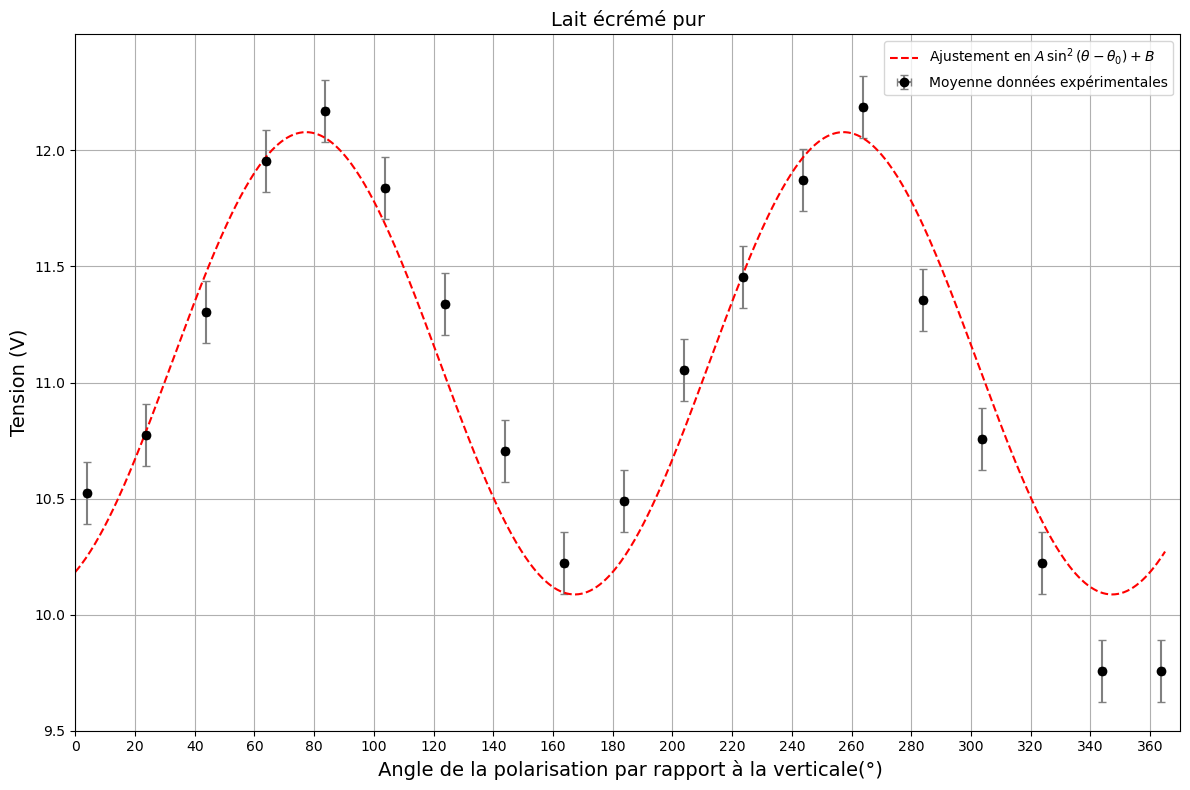

In [12]:
popt, pcov = curve_fit(malus_lame_sin,theta_deg, ep_mean, p0=p0, bounds=bounds)
yerr = np.sqrt(0.01**2 + (3.33*0.04)**2)

theta_fit = np.linspace(0, 365, 720)
plt.figure(figsize=(12, 8))
plt.errorbar(theta_deg, ep_mean, xerr=1, yerr=yerr, fmt='o', label="Moyenne données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), 'r--',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel(" Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait écrémé pur", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(9.5, 12.5)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(9.5, 12.5, 0.5))
plt.tight_layout()
plt.savefig("ep_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

## Lait entier pur

A = 1.070 
θ0 = -42.018° 
B = 7.728


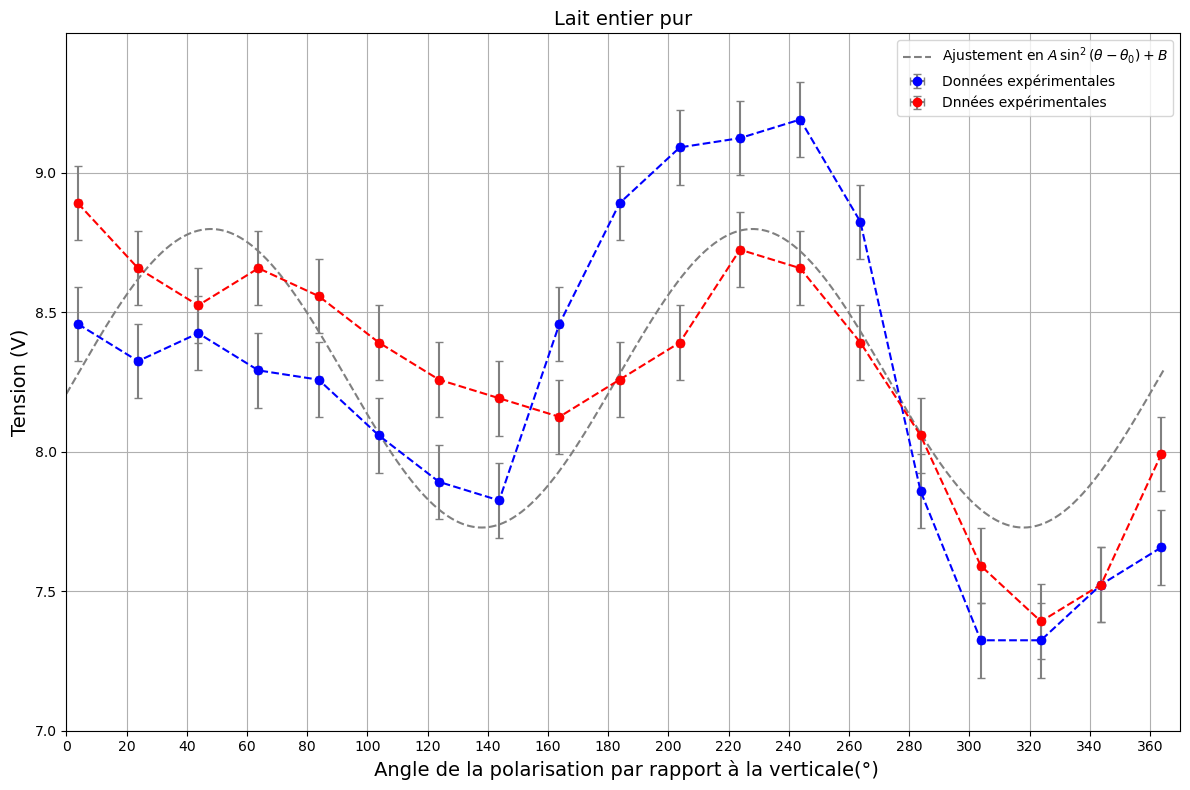

In [14]:
yerr = np.sqrt(0.01**2 + (3.33*0.04)**2)
popt, pcov = curve_fit(malus_lame_sin,theta_deg, entp_mean, p0=p0, bounds=bounds)


plt.figure(figsize=(12, 8))
plt.errorbar(theta_deg, entp_1, xerr=1, yerr=yerr, fmt='o', label="Données expérimentales", color='blue', ecolor='gray', capsize=3)
plt.errorbar(theta_deg, entp_2, xerr=1, yerr=yerr, fmt='o', label="Dnnées expérimentales", color='red', ecolor='gray', capsize=3)
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), '--',color='grey',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel(" Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait entier pur", fontsize=14)
plt.plot(theta_deg, entp_1, linestyle='--', color='blue')
plt.plot(theta_deg, entp_2, linestyle='--', color='red')
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(7, 9.5)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(7, 9.5, 0.5))
plt.tight_layout()
plt.savefig("entp_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

## Eau du robinet avec lentille de focalisation (de focale 15mm)

A = 0.007 
θ0 = 1.979° 
B = 0.016


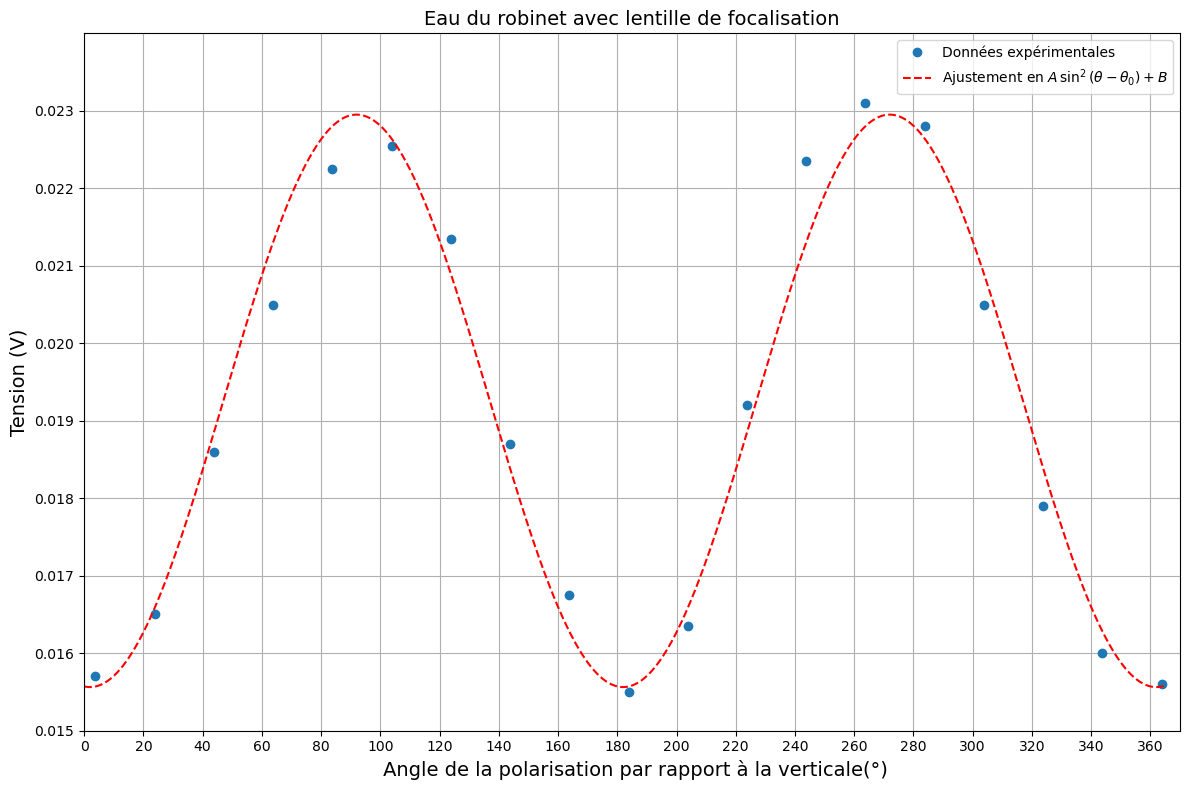

In [16]:
popt, pcov = curve_fit(malus_lame_sin,theta_deg, eau_mean, p0=p0, bounds=bounds)

theta_fit = np.linspace(0, 365, 720)
plt.figure(figsize=(12, 8))
plt.plot(theta_deg, eau_mean, linestyle = "", marker = 'o', label="Données expérimentales")
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), 'r--',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel(" Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Eau du robinet avec lentille de focalisation", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(0.015, 0.024)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(0.015, 0.024, 0.001))
plt.tight_layout()
plt.savefig("eau_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

## Lait entier dilution facteur 10

A = 3.948 
θ0 = -3.950° 
B = 8.477


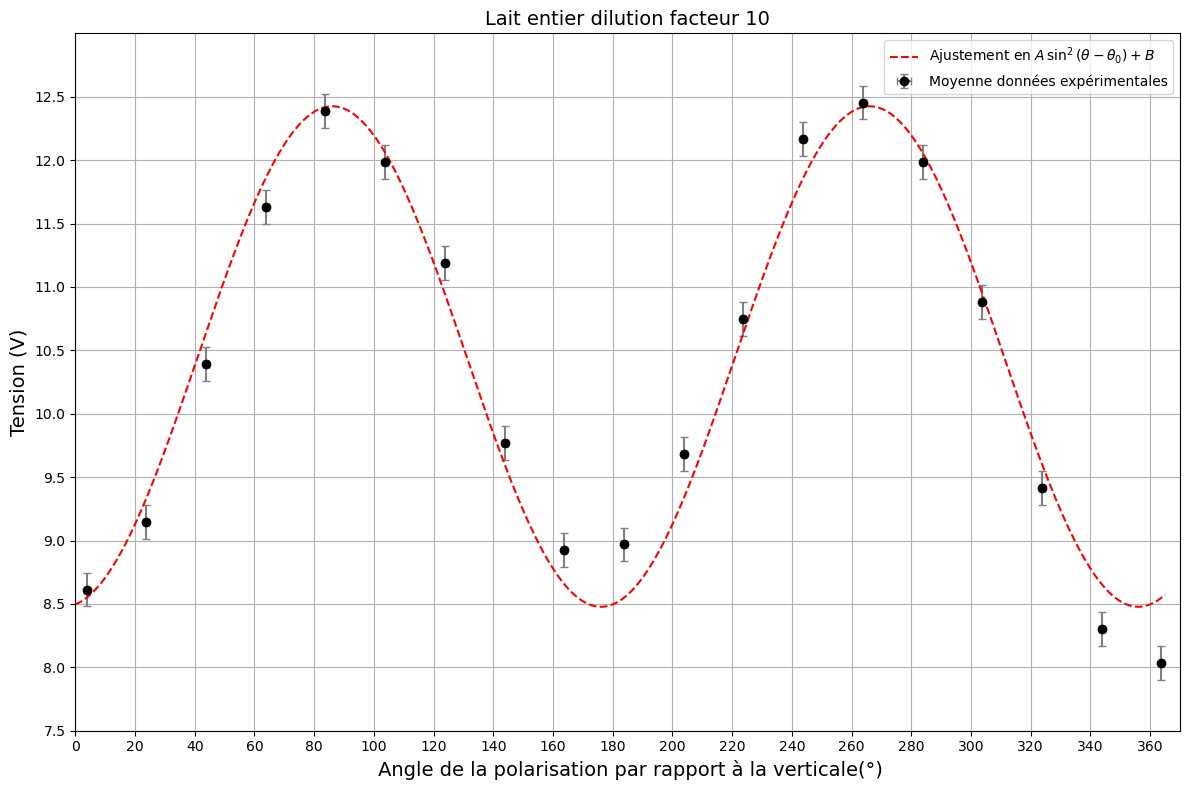

In [18]:
popt, pcov = curve_fit(malus_lame_sin,theta_deg, ent10_mean, p0=p0, bounds=bounds)
yerr = np.sqrt(0.01**2 + (3.33*0.04)**2)

theta_fit = np.linspace(0, 365, 720)
plt.figure(figsize=(12, 8))
plt.errorbar(theta_deg, ent10_mean, xerr=1, yerr=yerr, fmt='o', label="Moyenne données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), 'r--',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel(" Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait entier dilution facteur 10", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(7.5, 13)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(7.5, 13, 0.5))
plt.tight_layout()
plt.savefig("ent10_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

## Lait entier dilution facteur 100

A = 1.453 
θ0 = -0.310° 
B = 0.861


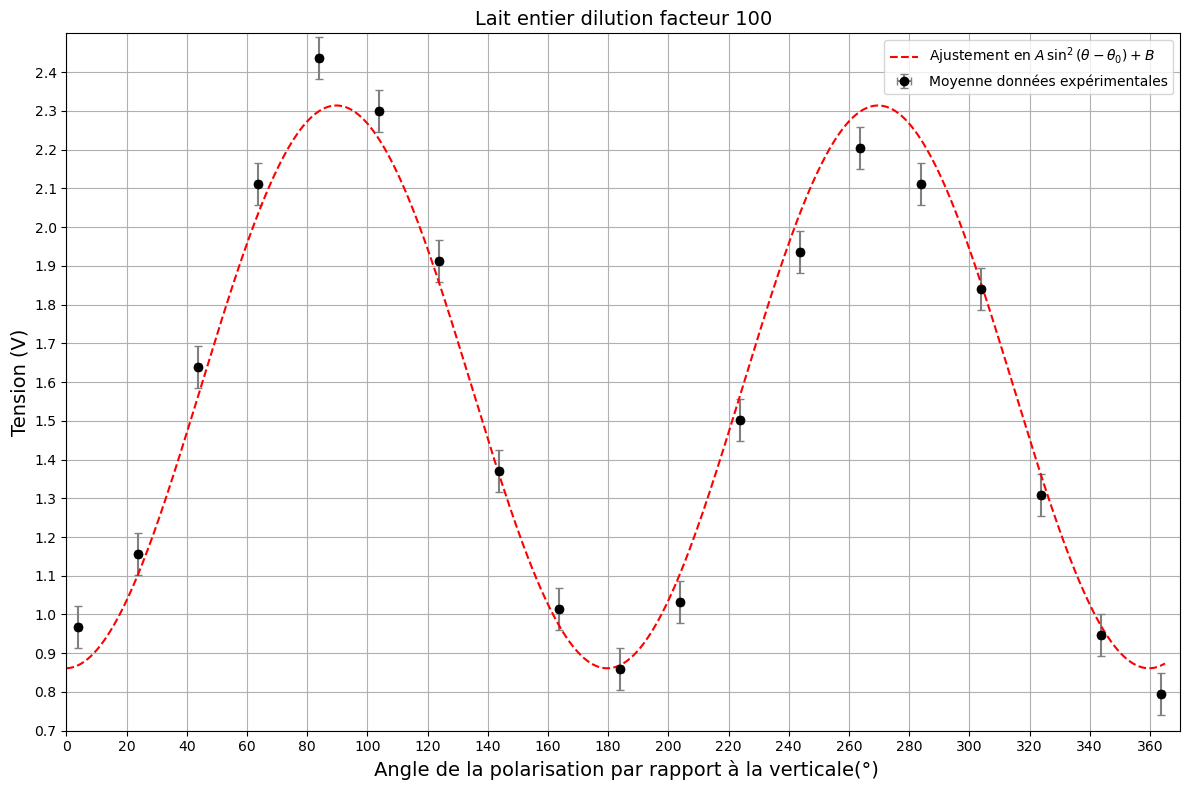

In [21]:
popt, pcov = curve_fit(malus_lame_sin,theta_deg, ent100_mean, p0=p0, bounds=bounds)
yerr = np.sqrt(0.01**2 + (3.33*0.016)**2)

theta_fit = np.linspace(0, 365, 720)
plt.figure(figsize=(12, 8))
plt.errorbar(theta_deg, ent100_mean, xerr=1, yerr=yerr, fmt='o', label="Moyenne données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), 'r--',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel(" Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait entier dilution facteur 100", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(0.7, 2.5)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(0.7, 2.5, 0.1))
plt.tight_layout()
plt.savefig("ent100_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

## Lait entier dilution facteur 500

A = 0.488 
θ0 = 1.821° 
B = 0.147


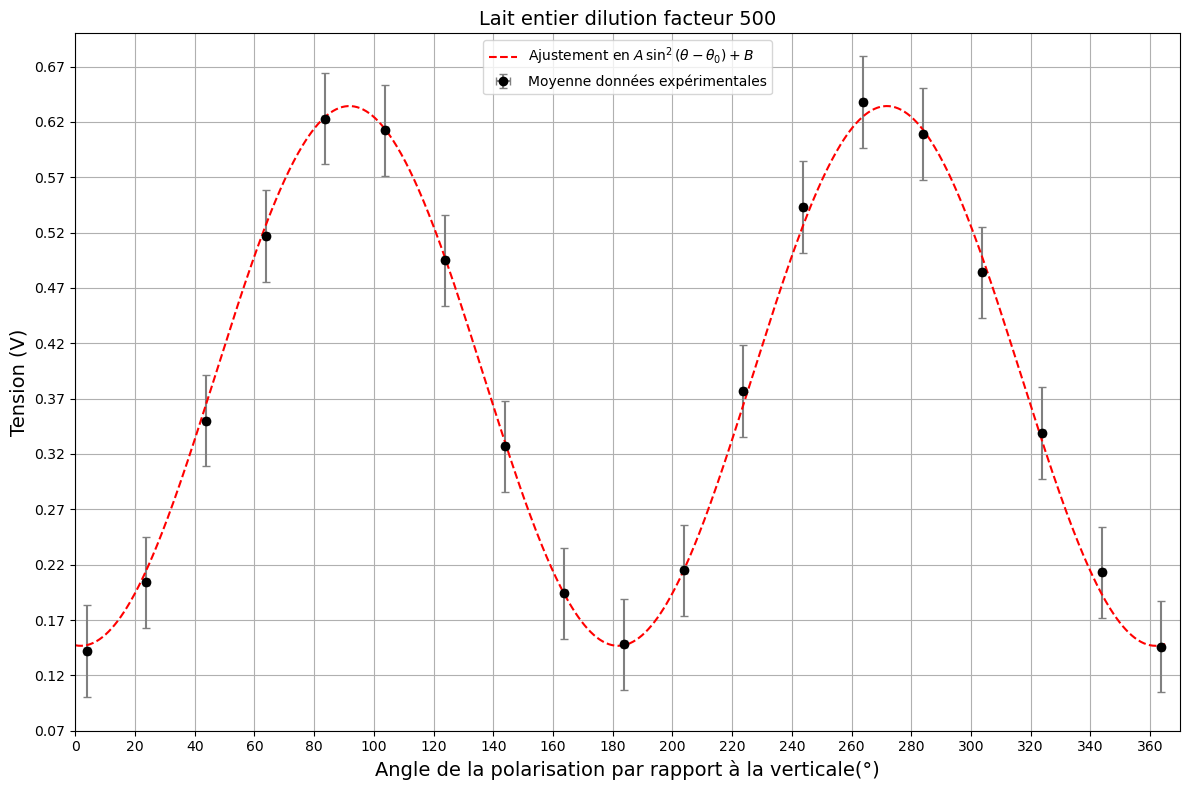

In [23]:
bounds = ([0.0,   -360.0,  0.0],[np.inf,  360.0, np.inf])
popt, pcov = curve_fit(malus_lame_sin,theta_deg, ent500_mean, p0=p0, bounds=bounds)
yerr = np.sqrt(0.01**2 + 0.04**2)

theta_fit = np.linspace(0, 365, 720)
plt.figure(figsize=(12, 8))
plt.errorbar(theta_deg, ent500_mean, xerr=1, yerr=yerr, fmt='o', label="Moyenne données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), 'r--',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel("Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait entier dilution facteur 500", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(0.09, 0.7)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(0.07, 0.7, 0.05))
plt.tight_layout()
plt.savefig("ent500_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

## Lait entier dilution facteur 1000

A = 0.278 
θ0 = 1.200° 
B = 0.062


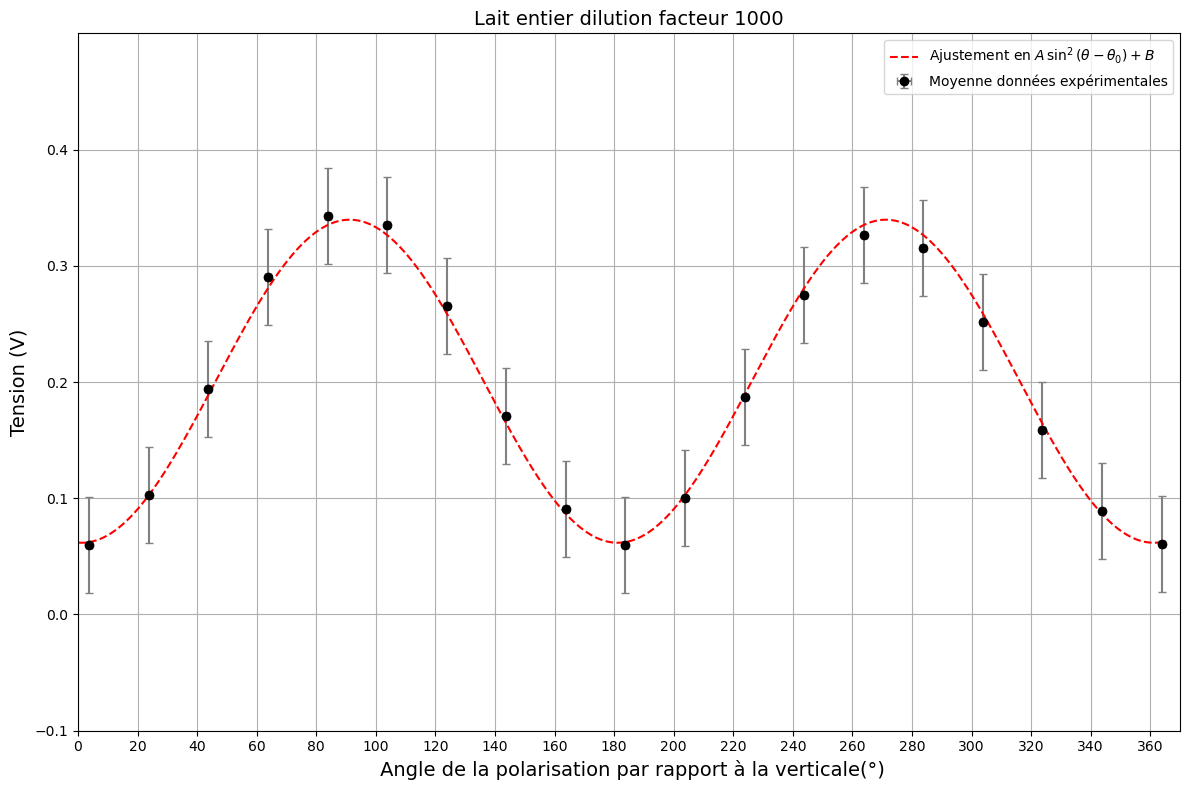

In [25]:
popt, pcov = curve_fit(malus_lame_sin,theta_deg, ent1000_mean, p0=p0, bounds=bounds)
yerr = np.sqrt(0.01**2 + 0.04**2)

theta_fit = np.linspace(0, 365, 720)
plt.figure(figsize=(12, 8))
plt.errorbar(theta_deg, ent1000_mean, xerr=1, yerr=yerr, fmt='o', label="Moyenne données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), 'r--',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel(" Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait entier dilution facteur 1000", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(-.1, 0.5)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(-.1, 0.5, 0.1))
plt.tight_layout()
plt.savefig("ent1000_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

## Lait entier dilution facteur 2500

A = 0.136 
θ0 = 2.215° 
B = 0.030


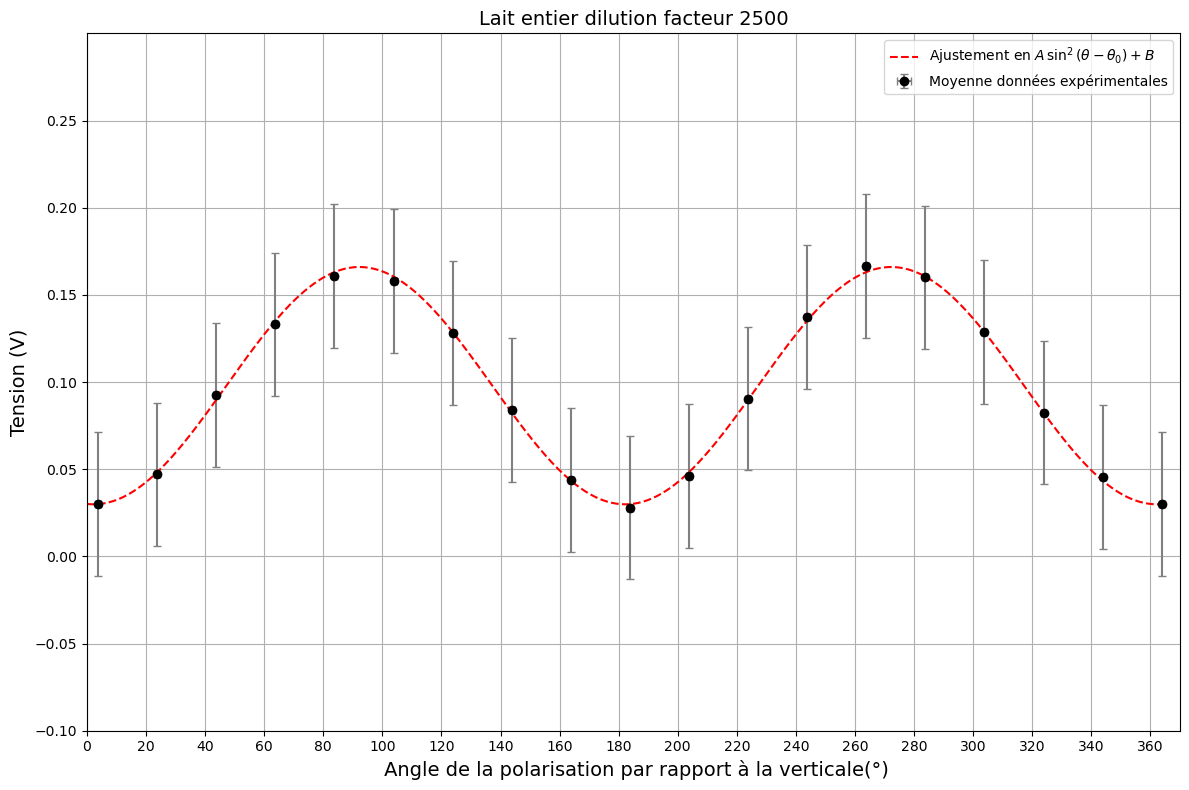

In [27]:
popt, pcov = curve_fit(malus_lame_sin,theta_deg, ent2500_mean, p0=p0, bounds=bounds)
yerr = np.sqrt(0.01**2 + 0.04**2)

theta_fit = np.linspace(0, 365, 720)
plt.figure(figsize=(12, 8))
plt.errorbar(theta_deg, ent2500_mean, xerr=1, yerr=yerr, fmt='o', label="Moyenne données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), 'r--',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel(" Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait entier dilution facteur 2500", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(-.1, 0.3)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(-.1, 0.3, 0.05))
plt.tight_layout()
plt.savefig("ent2500_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

## Lait entier dilution facteur 5000

A = 0.083 
θ0 = 1.650° 
B = 0.024


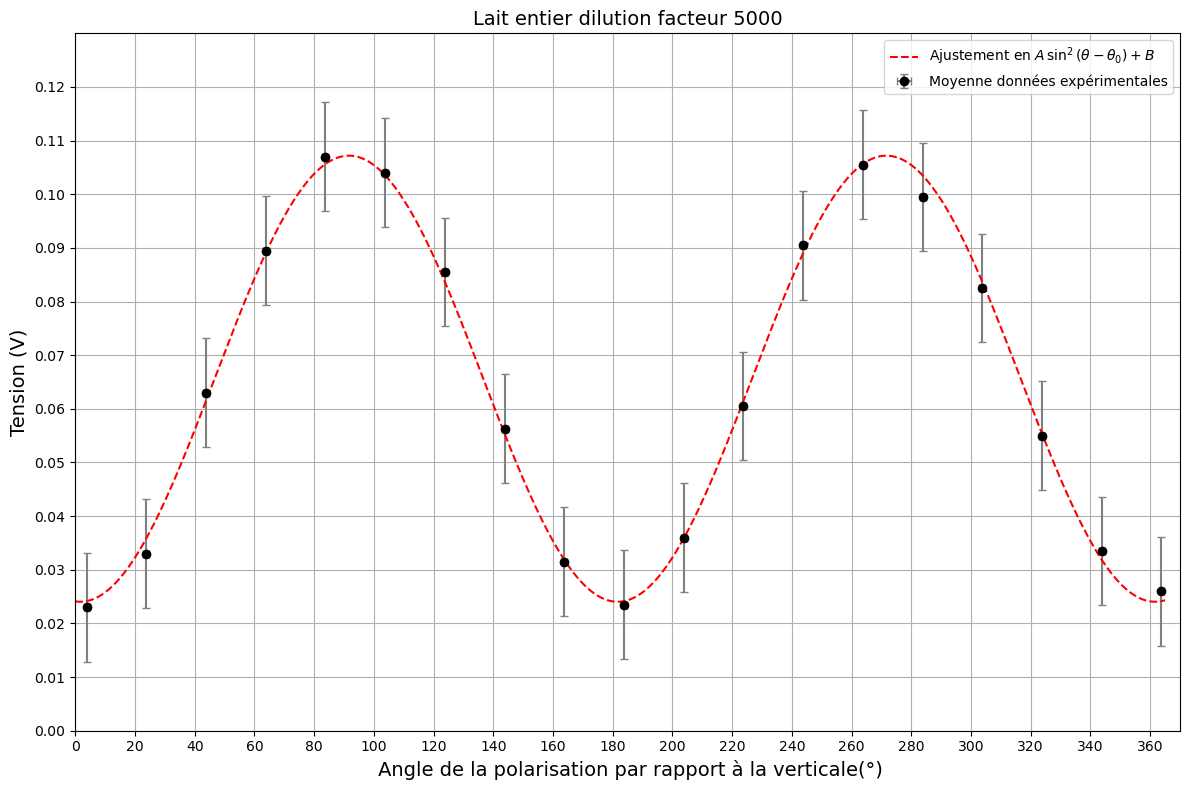

In [31]:
popt, pcov = curve_fit(malus_lame_sin,theta_deg, ent5000_mean, p0=p0, bounds=bounds)
yerr = np.sqrt(0.01**2 + 0.0016**2)

theta_fit = np.linspace(0, 365, 720)
plt.figure(figsize=(12, 8))
plt.errorbar(theta_deg, ent5000_mean, xerr=1, yerr=yerr, fmt='o', label="Moyenne données expérimentales", color='black', ecolor='gray', capsize=3)
plt.plot(theta_fit,malus_lame_sin(theta_fit, *popt), 'r--',label=r"Ajustement en $A\,\sin^2(\theta - \theta_0) + B$")
plt.xlabel(" Angle de la polarisation par rapport à la verticale(°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait entier dilution facteur 5000", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(0, 0.13)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(0, 0.13, 0.01))
plt.tight_layout()
plt.savefig("ent5000_moy_fit.png", dpi=300)

print(f"A = {popt[0]:.3f} \nθ0 = {popt[1]:.3f}° \nB = {popt[2]:.3f}")

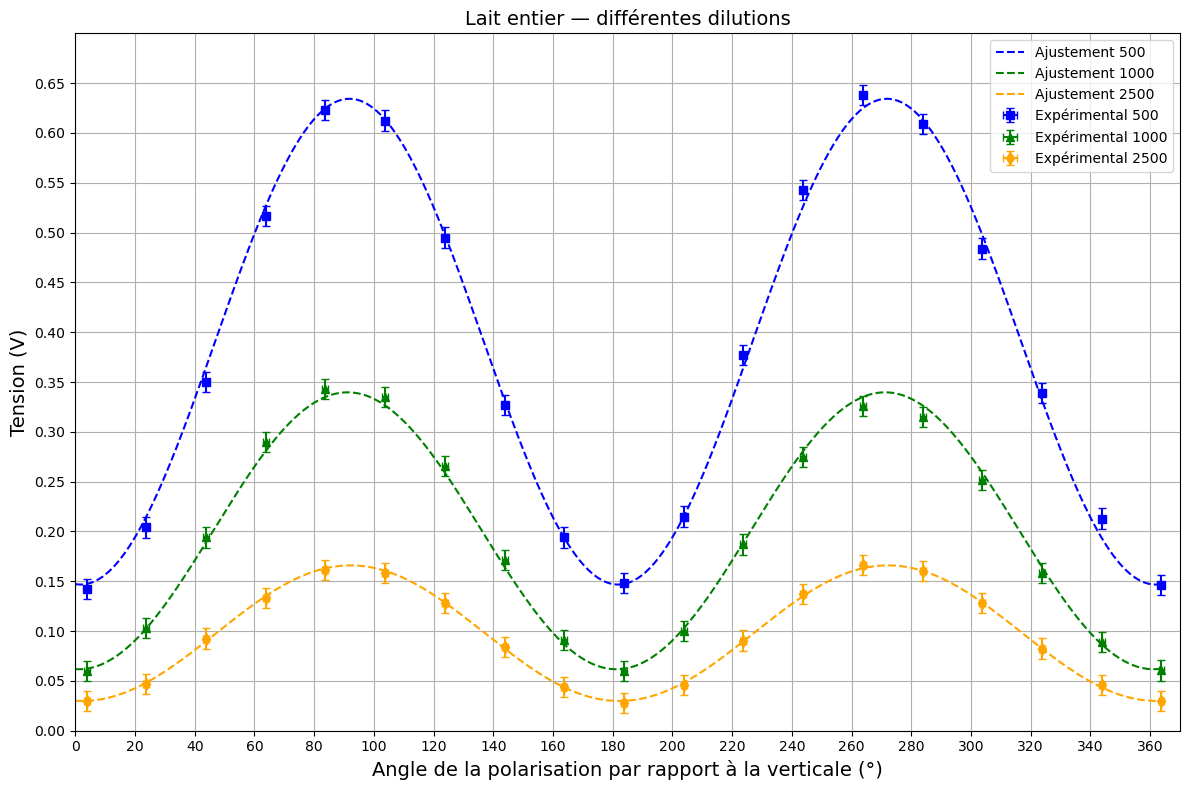

In [33]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Fit each dataset
datasets = {
    "500": ent500_mean,
    "1000": ent1000_mean,
    "2500": ent2500_mean,
}

fit_results = {}
theta_fit = np.linspace(0, 365, 720)
yerr = np.sqrt(0.01**2 + 0.0016**2)


colors = {
    "500": "blue",
    "1000": "green",
    "2500": "orange",
}
markers = {
    "500": "s",
    "1000": "^",
    "2500": "d",
}

plt.figure(figsize=(12, 8))

for label, data in datasets.items():
    popt, pcov = curve_fit(malus_lame_sin, theta_deg, data, p0=p0, bounds=bounds)
    fit_results[label] = popt

    # Plot experimental data
    plt.errorbar(theta_deg, data, xerr=1, yerr=yerr, fmt=markers[label], 
                 label=f"Expérimental {label}", color=colors[label], capsize=3)
    
    # Plot fit
    plt.plot(theta_fit, malus_lame_sin(theta_fit, *popt), '--', 
             color=colors[label], label=f"Ajustement {label}")

plt.xlabel("Angle de la polarisation par rapport à la verticale (°)", fontsize=14)
plt.ylabel("Tension (V)", fontsize=14)
plt.title("Lait entier — différentes dilutions", fontsize=14)
plt.grid(True)
plt.legend()
plt.xlim(0, 370)
plt.ylim(0, 0.7)
plt.xticks(np.arange(0, 370, 20))
plt.yticks(np.arange(0, 0.7, 0.05))
plt.tight_layout()
plt.savefig("ent_dilutions_fits.png", dpi=300)
